### Introduction
Real-world data rarely comes clean. Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling.


### Table of Contents
- [Gather](#gather)
- [Asses](#asses)
- [Clean](#clean)


<a id='gather'></a>
### Gather

In [200]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [70]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [71]:
# Download and save tweet image predicitons 

r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', 'w') as f:
    f.write(r.text)

In [72]:
image_pred = pd.read_csv('image_predictions.tsv', sep='\t')

In [43]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer



# ####input your credentials here
# consumer_key="HIDDEN"
# consumer_secret="HIDDEN"
# access_key = "HIDDEN"
# access_secret = "HIDDEN"

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_key, access_secret)
# api = tweepy.API(auth,wait_on_rate_limit=True)

# # # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # # These are hidden to comply with Twitter's API terms and conditions
# # consumer_key = 'HIDDEN'
# # consumer_secret = 'HIDDEN'
# # access_token = 'HIDDEN'
# # access_secret = 'HIDDEN'

# # auth = OAuthHandler(consumer_key, consumer_secret)
# # auth.set_access_token(access_token, access_secret)

# # api = tweepy.API(auth, wait_on_rate_limit=True)

# # # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # # Twitter API code was sent to this student from a Udacity instructor
# # # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = twitter_data.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)


In [73]:
with open('tweet_json.txt', 'r') as f:
    tweets = "[" + ','.join(f.readlines()) + "]"

tweet_json = pd.read_json(tweet_json)

<a id='asses'></a>

### Assest

In [56]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
646,793150605191548928,NaN,NaN,2016-10-31 18:00:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nida. She's a free elf. Waited so long...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793150605...,11,10,Nida,None,None,None,None
2314,666701168228331520,NaN,NaN,2015-11-17 19:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a golden Buckminsterfullerene named Jo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666701168...,8,10,a,None,None,None,None
1477,693622659251335168,NaN,NaN,2016-01-31 02:31:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you keepin the popcorn bucket in your lap...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693622659...,10,10,None,None,None,None,None
1970,673295268553605120,NaN,NaN,2015-12-06 00:17:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Eve. She's a raging alcoholic 8/10 (would...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673295268...,8,10,Eve,None,None,pupper,None
1600,686007916130873345,NaN,NaN,2016-01-10 02:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper has a magical eye. 11/10 I can't s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686007916...,11,10,None,None,None,pupper,None


In [45]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [53]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [61]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [63]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [64]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
           ... 
Taz           1
Skittles      1
Mollie        1
Blu           1
Mack          1
Name: name, Length: 957, dtype: int64

In [41]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [47]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [50]:
tweet_json.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1885,2015-12-09 02:34:18+00:00,674416750885273600,674416750885273600,This is Jonah. He's a Stinted Fisher Price. En...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674416741997535237, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1294,2016-03-06 17:52:42+00:00,706538006853918722,706538006853918720,"This is Oliver (pronounced ""Ricardo""). He's a ...",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 706537990542254082, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1324,2016-02-29 16:47:42+00:00,704347321748819968,704347321748819968,This is Ralphson. He's very confused. Wonderin...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 704347313985228800, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1107,2016-05-07 16:34:32+00:00,728986383096946689,728986383096946688,This is Puff. He started out on the streets (f...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 728986347021565952, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
506,2016-12-15 17:23:04+00:00,809448704142938112,809448704142938112,"I call this one ""A Blep by the Sea"" 12/10 http...",False,"[0, 41]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 809448667128074240, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [51]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
created_at                       2331 non-null datetime64[ns, UTC]
id                               2331 non-null int64
id_str                           2331 non-null int64
full_text                        2331 non-null object
truncated                        2331 non-null bool
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
source                           2331 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
in_reply_to_screen_name          77 non-null object
user                             2331 non-null object
geo                              0 non-null float64
coordinates                 

In [57]:
tweet_json.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2197
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

#### Quality
- tweet_id's are numerical not a string
- timestamp is of type string, should be of type datetime
- rating_numerator and rating_denominator should be float for fractions
- Incorrect values for rating_denominator, should be only 10
- retweets should not be included
- Nulls represented as (None) in 'doggo' 'floofer'	'pupper' 'puppo' columns
- dog 'stage' should be of type 'category' 
- missing column (fraction) for the rating_numerator and rating_denominator 

#### Tideness

- dog "stage" should be in one column
- Merging the 3 dataframes

<a id='clean'></a>
## Clean

### Quality issues

In [167]:
# making copies for editing for each dataframe
twitter_archive_clean = twitter_archive.copy()
image_pred_clean = image_pred.copy()
tweet_json_clean = tweet_json.copy()

### Define
conver tweet_id's to String for all dataframes

In [168]:
twitter_archive_clean["tweet_id"] = twitter_archive_clean["tweet_id"].astype(str)
tweet_json_clean["id"] = tweet_json_clean["id"].astype(str)
image_pred_clean["tweet_id"] = image_pred_clean["tweet_id"].astype(str)

### Test

In [169]:
print(twitter_archive_clean.info())
print(tweet_json_clean.info())
print(image_pred_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### Define
change 'timestamp' column to datetime

In [170]:
twitter_archive_clean["timestamp"] = pd.to_datetime(twitter_archive_clean["timestamp"])

### Test

In [171]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64

### Define
change rating_numerator and rating_denominator to float

In [172]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)

In [173]:
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype(float)

### Test

In [174]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: dateti

### Define
change Incorrect values for rating_denominator to be only 10

In [175]:
twitter_archive_clean.rating_denominator = 10

### Test

In [176]:
twitter_archive_clean.rating_denominator .value_counts()

10    2356
Name: rating_denominator, dtype: int64

### Define
remove retweets to consider only original tweets

In [177]:
# count original Tweets
twitter_archive_clean.retweeted_status_id.isnull().sum()

2175

In [178]:
# drop retweets
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean.retweeted_status_id)]

### Test

In [179]:
twitter_archive_clean.retweeted_status_id.shape[0]

2175

### Define
change null values represented as (None) in 'doggo' 'floofer' 'pupper' 'puppo' columns 

In [180]:
dog_stage = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean[dog_stage] = twitter_archive_clean[dog_stage].replace('None', '')

In [181]:
twitter_archive_clean[dog_stage]

,doggo,floofer,pupper,puppo
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,
...,...,...,...,...
2351,,,,
2352,,,,
2353,,,,
2354,,,,


### Define
change dog 'stage' type to category

In [182]:
twitter_archive_clean[dog_stage] = twitter_archive_clean[dog_stage].astype('category')

### Test

In [184]:
print(twitter_archive_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null category
floofer                       2175 non-null category
pupper                        2175 non-null category
puppo                         2175 non-null category
dtypes: catego

### Define
create column (fraction) for the rating_numerator and rating_denominator 

In [185]:
twitter_archive_clean['fraction'] = twitter_archive_clean.rating_numerator / twitter_archive_clean.rating_denominator

### Test

In [186]:
twitter_archive_clean['fraction']

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
2351    0.5
2352    0.6
2353    0.9
2354    0.7
2355    0.8
Name: fraction, Length: 2175, dtype: float64

## Tideness

### Define 
create dog "stage" column representing all four stages 'doggo', 'floofer', 'pupper', 'puppo' 

In [187]:
dog_stage = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean['stage'] = stage.apply(lambda x: ''.join(x), axis=1).replace('^$', np.nan, regex=True)
twitter_archive_clean.drop(dog_stage, axis=1, inplace=True)

second line in above cell helped from stackoverflow in reference

### Test

In [189]:
twitter_archive_clean.stage.value_counts()

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggopuppo        1
doggofloofer      1
Name: stage, dtype: int64


### Define
Merge the 3 dataframes into single dataframe

In [190]:
twitter_archive_clean = pd.merge(left = twitter_archive_clean, right = image_pred_clean, left_on='tweet_id',
                                  right_on='tweet_id', how='inner')

In [196]:
twitter_archive_clean = pd.merge(left = twitter_archive_clean, right = tweet_json_clean, left_on='tweet_id',right_on='id' ,how='inner')


In [198]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 58 columns):
tweet_id                         1987 non-null object
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        1987 non-null datetime64[ns, UTC]
source_x                         1987 non-null object
text                             1987 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    1987 non-null object
rating_numerator                 1987 non-null float64
rating_denominator               1987 non-null int64
name                             1987 non-null object
fraction                         1987 non-null float64
stage                            305 non-null object
jpg_url                          1987 non-null object
img_num                  

## Store Cleaned Data

export cleaned data as csv format for analysis

In [199]:
twitter_archive_clean.to_csv("twitter_archive_master.csv", index = False)

## Analyzing, and Visualizing Data

In [ ]:
master = pd.read_csv('twitter_archive_master.csv')

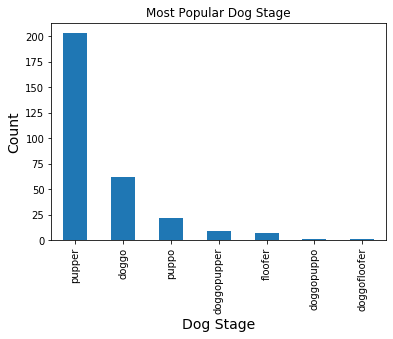

In [222]:
master['stage'].value_counts().plot(kind='bar', title = 'Most Popular Dog Stage');
plt.xlabel('Dog Stage', fontsize=14)
plt.ylabel('Count', fontsize=14);


## insight 1
pupper stage is the most Popular stage followed by doggo and then puppo

In [216]:
master.p1.value_counts()

golden_retriever      139
Labrador_retriever     93
Pembroke               88
Chihuahua              79
pug                    54
                     ... 
skunk                   1
standard_schnauzer      1
African_crocodile       1
leaf_beetle             1
sliding_door            1
Name: p1, Length: 374, dtype: int64

In [217]:
master.p2.value_counts()

Labrador_retriever          96
golden_retriever            81
Cardigan                    72
Chihuahua                   43
Chesapeake_Bay_retriever    40
                            ..
leafhopper                   1
comic_book                   1
accordion                    1
solar_dish                   1
horse_cart                   1
Name: p2, Length: 401, dtype: int64

In [218]:
master.p3.value_counts()

Labrador_retriever    76
Chihuahua             57
golden_retriever      46
Eskimo_dog            36
kelpie                33
                      ..
screw                  1
chickadee              1
desktop_computer       1
jeep                   1
great_grey_owl         1
Name: p3, Length: 405, dtype: int64

## insight 2
it looks like the algorithm predicts golden_retriever most of the time as its first prediction, while Labrador_retriever is the most predicted as second and third prediction

In [226]:
master.source_x.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1949
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source_x, dtype: int64

## insight 3
source of each tweet shows that most tweets are tweeted using iPhone

Reference : https://stackoverflow.com/questions/54390606/having-trouble-replacing-empty-strings-with-nan-using-pandas-datafranme-replace/54390823